# 𝑻𝑯𝑬 𝑺𝑷𝑨𝑹𝑲𝑺 𝑭𝑶𝑼𝑵𝑫𝑨𝑻𝑰𝑶𝑵

### Author: Riyaz Mehendi Khorasi

## Task 5 - Exploratory Data Analysis - Sports

#### Performing ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.  As a sports analysts, need to find out the most successful teams, players and factors contributing win or loss of a team and Suggesting teams or players a company should endorse for its products.

##### Dataset Link: https://bit.ly/34SRn3b

## 1. Problem Statement

"This is IPL's data containing 2 datasets - one gives details about the venues and players while the other captures
ball-by-ball stats over 12 years of the league (2008-2018)". Here we will try to get an overview of IPL in terms of teams, venues, umpires, toss decisions, winners and individual batsmen and bowlers.


<a id=section2></a>
## 2. Importing Packages

In [2]:
#loading packages
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings  # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

<a id=section3></a>
## 3. Loading Data

In this **EDA notebook** we are using two datasets about **Indian Premier League**. 

- 1. **IPL matches**  dataset: This dataset contains information about the **venues, players, umpires, toss decisions** in **696 matches** of **IPL** from 2008 - 2019.


- 2. **IPL deliveries** dataset: This dataset contains ball-by-ball information about **696 matches** of **IPL** from 2008 - 2019. 

### Importing 1st Dataset

In [3]:
#load data
matches = pd.read_csv("C:/Users/RK/Desktop/TSF/Tech_Tasks/Task-5_IPL/matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides **matches information** in **IPL till 2019**. It gives information on teams, cities, venues, toss decisions, winers and umpires.

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

- ```info``` function gives us the following insights into the matches dataframe:

  - There are a total of **756 rows** and **18 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype and **13 columns** with an **object** datatype.
  
  - There are **missing** values in the **city, winner, player_of_match, umpire1, umpire2 and umpire3** columns.

### Importing 2nd Dataset

In [5]:
#load data
deliveries = pd.read_csv("C:/Users/RK/Desktop/TSF/Tech_Tasks/Task-5_IPL/deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides **deliveries information** in **IPL till 2019**. It gives ball by ball details of all matches in IPL along with total runs scored by each batsman, wickets taken by each bowler and extras provided in each match.

In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

- ```info``` function gives us the following insights into the deliveries dataframe:

  - There are a total of **164750 rows** and **21 columns** in the dataframe.
  
  - There are **13 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **missing** values in the **player_dismissed, dismissal_kind and fielder** columns.

- We will **merge** the 2 datasets so as to gain more insights from the data.

- But we will work on each dataset separately and use the merged dataset when required.

In [7]:
#merging the 2 datasets
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

- ```info``` function gives us the following insights into the merge_df dataframe:

  - There are a total of **179078  rows** and **39 columns** in the dataframe now.
  
  - There are **18 columns** with a **numeric** datatype and **21 columns** with an **object** datatype.
  
  - There are **missing** values in the **player_dismissed, dismissal_kind, fielder, city, winner, player_of_match and all umpire** columns.

In [9]:
matches.id.is_unique

True

In [10]:
#since id is unique we can set this as our index
matches.set_index('id', inplace=True)

In [11]:
#Summary statistics of matches data
matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2017-04-29,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


- ```describe``` function gives us the following insights into the matches dataframe:

  - **win_by_runs** and **win_by_wickets** are the only numeric columns.
  
  - **win_by_runs** is right skewed with outliers.
  
  - Rest all columns are either already categorical or can be interpreted as categorical even if inputted as numeric  

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [12]:
#per profiling of matches dataset
pre_profile = matches.profile_report(title="Matches Profile before Data Preprocessing")
pre_profile.to_file(output_file="matches_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables:	18
- Number of observations:	756
- Missing cells:	656
- Missing cells: (%)	4.8%
- Duplicate rows:	0


__Variables types__: 
- Numeric = 4
- Categorical = 13
- Boolean = 1

<br>

- **city** has **7 missing values**.


- **dl_applied** has **2 values - 0 and 1**.


- **id** is **unique with no missing values**.


- **player_of_match** has **4 missing values**.


- **result column** has **3 distinct values** **normal, tie and no result**.


- **season** has a **12 distinct values 2008-2018**.


- **team1 and team2** have a **15 distinct values**.


- **toss_decision** has a **2 distinct values - field and bat**.


- **umpire1 and umpire2** have a **two missing value**.


- **umpire3** has a **637 missing values(84.3%)**.


- **venue** has a **41 distinct values**.


- **winner** has a **15 distinct values**. However, team1 and team2 columns show 14 distinct values. so we need to further investigate this column with 3 missing values.

- **win_by_wickets** has a **11 distinct values most of which are 0 signifying that team won batting first**.


- **win_by_runs** has a **89 distinct values and right skewed distribution with outliers**.

In [13]:
#per profiling of deliveries dataset
pre_profile2 = deliveries.profile_report(title="Deliveries Profile before Data Preprocessing")
pre_profile2.to_file(output_file="deliveries_profiling_before_preprocessing.html")

179078**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 21
- Number of observations: 179078
- Missing cells: 13.6%


__Variables types__: 
- Numeric = 11
- Categorical = 9
- Boolean = 1

<br>

- **516** distinct batsmen have played IPL so far


- **405** distinct bowlers have bowled in IPL


- **bye_runs** column has 5 distinct values 0-4


- **dismissal_kind** column has 9 distinct values capturing the types of outs. It has 95% missing values


- **player_dismissed** column has 95% missing values


- **extra_runs** has 7 distinct values 0-7 which takes into account byes,leg byes, wides, no balls and penalties


- There have been only 81 occassions where there were instances of super over


- **penalty_runs** column has 2 values 0 and 5


- **legbye_runs** and **wide_runs** columns have 6 distinct values 0-5


- **noball_runs** column has 5 distinct values 0,1,2,3 and 5


- **batsman_runs** column has **8** distinct values - 0 to 7 as it gives details about runs scored on every ball. 
  7 runs in one ball is a bit unrealistic but there can be situations where a no ball is bowled 
  and batsman runs 3 and then there is an overthrow which goes for 4. There are just 3 instances of this in the data

- **Harbhajan** has bowled most number of overs in IPL till 2019.


- **Virat Kohli** has faced most balls in IPL


- **batting_team** and **bowling_team** both have 14 distinct values

<a id=section4></a>
## 4. Data Preprocessing

- Here we will perform **Data Preprocessing** on our matches dataset first, to make the data usable for **EDA**.

In [14]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


From Pre profiling, we found that:
- **city** has missing values

- **team1** and **team2** columns have 14 distinct values but **winner** has 15 distinct values

- **umpire1** and **umpire2** have 1 missing value each

- **umpire3** has 94% missing values

- **city** has 33 distinct values while **venue** has 35 distinct values

Will take each of the above observations and work on them to make the data ready for EDA

In [15]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty

matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [16]:
#City values are empty for venue = Dubai International Cricket Stadium.
#So, missing values can be filled with Dubai

In [17]:
matches.city = matches.city.fillna('Dubai')

There are no more missing values in city column

In [18]:
#Player of match has 3 missing values. 
#Let's see this based on result column to find why it is empty

matches[matches.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
id,,
301,NaN,no result
546,NaN,no result
571,NaN,no result
11340,NaN,no result


This shows when there was no result(may be match was abandoned) then there was no player_of_match which makes sense

In [19]:
#umpire1 and umpire2 columns have one missing value each

matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


So for the above 2 matches, umpire records were not captured

In [20]:
#umpire3 column has close to 84.3% missing values. hence dropping that column

matches = matches.drop('umpire3', axis = 1)

In [21]:
#team 1 and team2 have 15 distinct values while winner has 15 distinct values. 
#Let's check the values of the winner column

matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. so we can just keep one of the names

In [22]:
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [23]:
matches.nunique()

season              12
city                33
date               546
team1               14
team2               14
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              14
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
dtype: int64

So now team1, team2 and winner columns all have 14 distinct values

city has 33 distinct values while we have 35 venues. Let's find out venues grouped by cities to see which cities have multiple venues

In [24]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

Observations
- Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali     whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of   the stadium there
- Mumbai has 3 stadiums/venues used for IPL
- Pune has 2 venues for IPL

In [25]:
matches['city'] = matches['city'].replace('Bangalore','Bengaluru')

In [26]:
matches['city'] = matches['city'].replace('Chandigarh','Mohali')
matches.venue = matches.venue.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')

In [27]:
#checking number of cities and venues now

print(matches.city.nunique())
print(matches.venue.nunique())

31
40


- Here we will perform **Data Preprocessing** on our deliveries dataset first, to make the data usable for **EDA**.

In matches dataset, Rising Pune Supergiants had duplicate entries. Let's check if the same exists here as well

In [36]:
#We will check the batting_team and bowling_team values

print(deliveries.batting_team.unique())
print(deliveries.bowling_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


The same problem exists. Making it Rising Pune Supergiants

In [38]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

### Merging the datasets again

In [39]:
#merging the 2 datasets
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our matches dataset

In [40]:
post_profile = matches.profile_report(title="Matches Profile after Data Preprocessing")
post_profile.to_file(output_file="matches_profiling_after_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 17
- Number of observations: 756
- Missing cells: 12
- Missing cells (%):0.1%


__Variables types__: 
- Numeric = 4
- Categorical = 12
- Boolean = 1

<br>

- **city** has **no missing values** now and has 31 distinct values.


- **dl_applied** has **2 values - 0 and 1**.


- **player_of_match** has **4 missing values** as we have not filled in because it can not be done as 4 matches were     abaondoned. But this will not hamper our analysis.


- **result column** has **3 distinct values** **normal, tie and no result**.


- **season** has a **12 distinct values 2008-2019**.


- **team1 and team2** have a **14 distinct values**.


- **toss_decision** has a **2 distinct values - field and bat**.


- **umpire1 and umpire2** have a **two missing value**. This will aslo not hamper our analysis.


- **venue** has a **40 distinct values**.


- **winner** now has a **14 distinct values** in line with team1 and team2 columns


- **win_by_wickets** has a **11 distinct values most of which are 0 signifying that team won batting first**.


- **win_by_runs** has a **right skewed distribution with outliers**.

- Here, we will perform **Pandas Profiling after preprocessing** on our deliveries dataset

In [41]:
post_profile = deliveries.profile_report(title="Deliveries Profile after Data Preprocessing")
post_profile.to_file(output_file="deliveries_profiling_after_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 21
- Number of observations: 179078
- Missing cells	513118
- Missing cells: 13.6%


__Variables types__: 
- Numeric = 10
- Categorical = 10
- Boolean = 1

<br>

- There are no more duplicate values in **batting_team** and **bowling_team** columns now. Both have 13 distinct values now


- Rest all other columns remain same for further analysis as below


- **516** distinct batsmen have played IPL so far


- **405** distinct bowlers have bowled in IPL


- **bye_runs** column has 5 distinct values 0-4


- **dismissal_kind** column has 10 distinct values capturing the types of outs. It has 95% missing values


- **player_dismissed** column has 95% missing values


- **extra_runs** has 7 distinct values 0-7 which takes into account byes,leg byes, wides, no balls and penalties


- There have been only 81 occassions where there were instances of super over


- **penalty_runs** column has 2 values 0 and 5


- **legbye_runs** and **wide_runs** columns have 6 distinct values 0-5


- **noball_runs** column has 5 distinct values 0,1,2,3 and 5


- **batsman_runs** column has **8** distinct values - 0 to 7 as it gives details about runs scored on every ball. 
  7 runs in one ball is a bit unrealistic but there can be situations where a no ball is bowled 
  and batsman runs 3 and then there is an overthrow which goes for 4. There are just 3 instances of this in the data

- **Harbhajan** has bowled most number of overs in IPL till 2018.


- **Virat Kohli** has faced most balls in IPL

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 

Here we will first start by analysing individual columns that is do univariate analysis and then move on to bivariate and multivariate analysis. In the course of this we will try to answer few questions that will tell us more about each venue, toss winner, individual players, umpires, etc.

<a id=section501></a>
## 5.1 Univariate Analysis on Matches Data

Here we are first doing univariate analysis on matches data

<a id=section50101></a>
### 5.1.1 How many matches were played each season?

In [42]:
matches.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

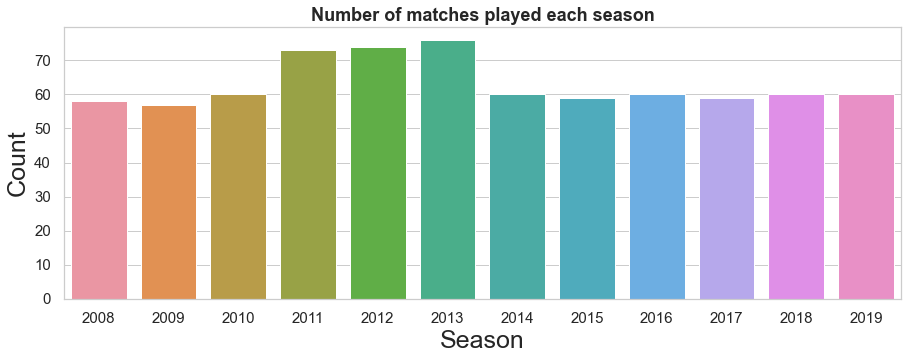

In [43]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- **2011-2013** have more matches being played than other seasons

- All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

- Let's find out the reason for this

<a id=section50101></a>
### 5.1.2 How many teams played in each season?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

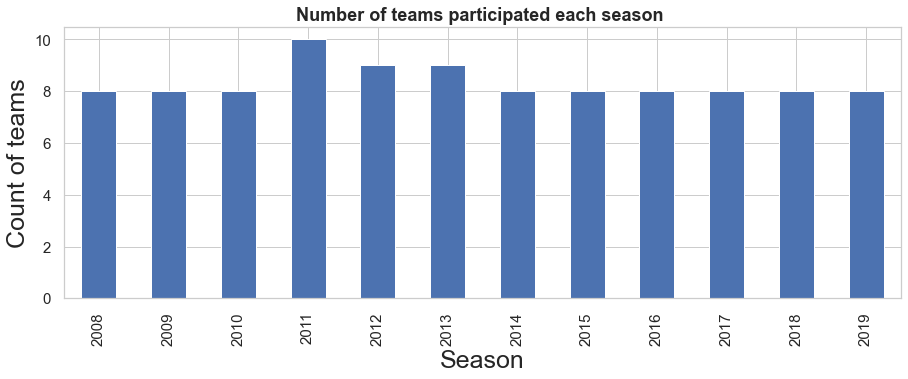

In [44]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- **10 teams** played in 2011 and **9 teams** each in 2012 and 2013

- This explains why 2011-2013 have seen more matches being played than other seasons


<a id=section50101></a>
### 5.1.3 Which team has dominated IPL so far?

In [45]:
#creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Sunrisers Hyderabad'),
  Text(0, 5, 'Deccan Chargers')])

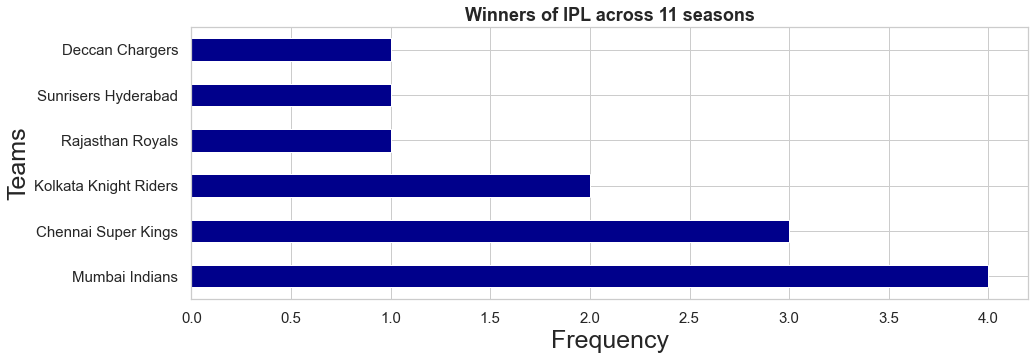

In [46]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- **MI** won 4 times and **CSK** have  won 3 times each followed by **KKR** who has won 2 times.
- Actually Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

<a id=section50101></a>
### 5.1.4 Venue which has hosted most number of IPL matches?

In [47]:
matches.venue.value_counts().sort_values(ascending = False)

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Punjab Cricket Association IS Bindra Stadium, Mohali    49
Sawai Mansingh Stadium                                  47
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Saurashtra Cricket Association Stadium                  

Text(0.5, 0, 'Frequency')

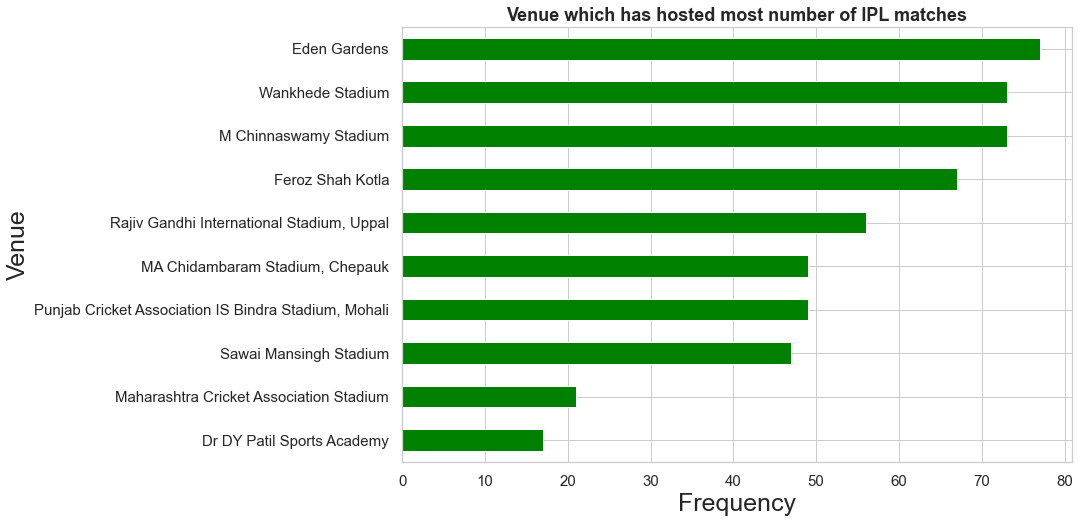

In [48]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

- **Eden Gardens** in Kolkata has hosted the highest number of matches so far in IPL followed by **Wankhede Stadium** in Mumbai

<a id=section50101></a>
### 5.1.5 Umpires who have appeared in most number of matches?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'HDPK Dharmasena'),
  Text(0, 2, 'C Shamshuddin'),
  Text(0, 3, 'AK Chaudhary'),
  Text(0, 4, 'SJA Taufel'),
  Text(0, 5, 'M Erasmus'),
  Text(0, 6, 'Asad Rauf'),
  Text(0, 7, 'BR Doctrove'),
  Text(0, 8, 'Nitin Menon'),
  Text(0, 9, 'RE Koertzen')])

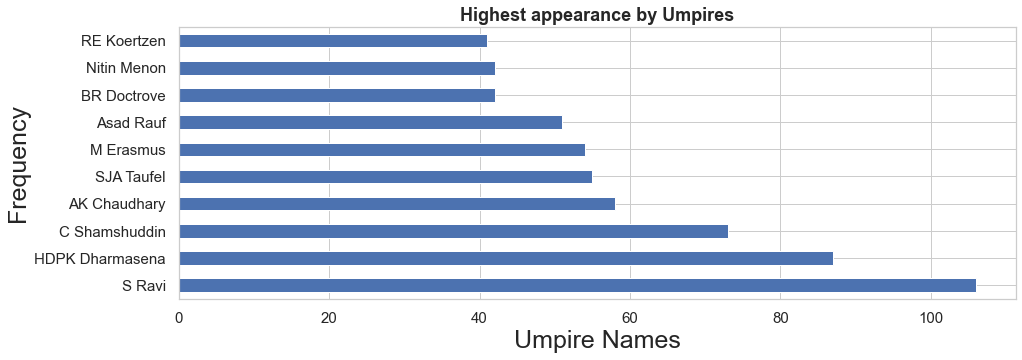

In [49]:
#A simple concatenation of 2 umpire columns will give us the total number of matches that each umpire has umpired
umpire_total = pd.concat([matches.umpire1,matches.umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Highest appearance by Umpires",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Umpire Names", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- **S Ravi** has appeared in most IPL matches (more than 100).

<a id=section50101></a>
### 5.1.6 Is there a relationship between umpires and finals?

In [50]:
#umpires who stood most in finals
final_umpires = matches[['season','winner','umpire1','umpire2']]
umpire1_dict = {}
for i in sorted(final_umpires.season.unique()):
    umpire1_dict[i] = final_umpires[final_umpires.season == i]['umpire1'].tail(1).values[0]

umpire2_dict = {}
for i in sorted(final_umpires.season.unique()):
    umpire2_dict[i] = final_umpires[final_umpires.season == i]['umpire2'].tail(1).values[0]
    
final_umpire_df1 = pd.DataFrame({'umpire1':umpire1_dict})
final_umpire_df2 = pd.DataFrame({'umpire1':umpire2_dict})

#concatinating both dfs
final_match_umpires = pd.concat([final_umpire_df1,final_umpire_df2], ignore_index=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

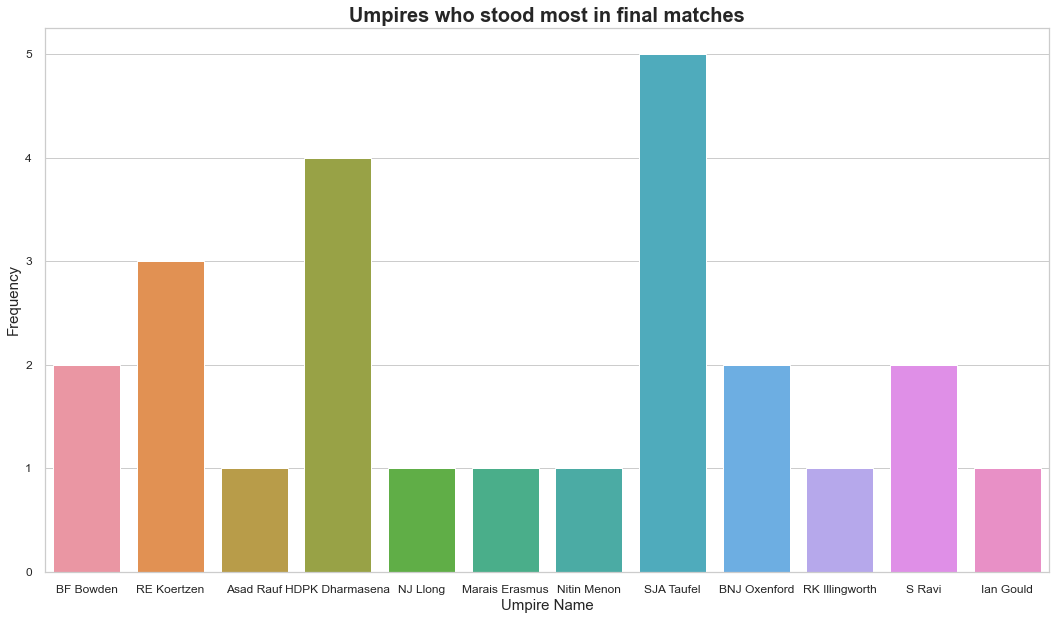

In [51]:
plt.figure(figsize = (18,10))
sns.countplot('umpire1', data = final_match_umpires)
plt.title("Umpires who stood most in final matches", fontsize = 20, fontweight = 'bold')
plt.xlabel("Umpire Name", size= 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Simon Taufel has stood in 5 finals-most by any umpire. May be he has been best throughout most of the seasons.

<a id=section50101></a>
### 5.1.7 Do teams bat first or second after winning toss?

In [52]:
matches.toss_decision.value_counts()/len(matches)*100

field    61.243386
bat      38.756614
Name: toss_decision, dtype: float64

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

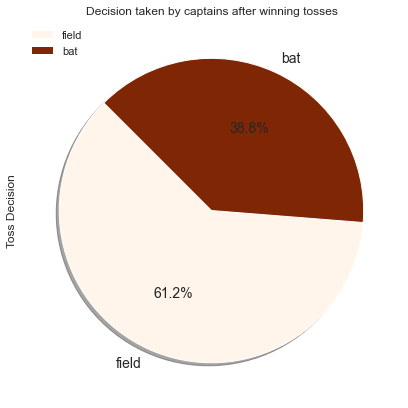

In [53]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

- Upto 61.2% times teams who have won tosses have decided to chase down

<a id=section50101></a>
### 5.1.8 Do teams win more batting first or batting second?

In [54]:
#In order to answer this question, we create a new column specifying whether team has won batting first or second
#win_by_runs and win_by_wickets columns are needed to find the answer to above question
#When win_by_runs is 0 implies team has won by wickets. Similary if win_by_wickets is 0 implies team has won by runs
#However there are ties and no results as well and for those there should not be any winner
#Let's check the win_by_runs and win_by_wickets columns fortie and no result

tie_noresult = matches[(matches.result == 'tie') | (matches.result == 'no result')][['win_by_runs','win_by_wickets']]
tie_noresult

,win_by_runs,win_by_wickets
id,,
34,0,0
126,0,0
190,0,0
301,0,0
388,0,0
401,0,0
476,0,0
536,0,0
546,0,0


So both win_by_runs and win_by_wickets columns have 0 values simultaneously for tied and abandoned matches

In [55]:
#Creating a new column named 'win_batting first' which is equal to 1 if team has won batting first and equal
#to 0 if team has won batting second

new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_batting_first
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Yes
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No
5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Yes


In [56]:
new_matches.win_batting_first.value_counts()/len(new_matches)*100

No     54.643338
Yes    45.356662
Name: win_batting_first, dtype: float64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

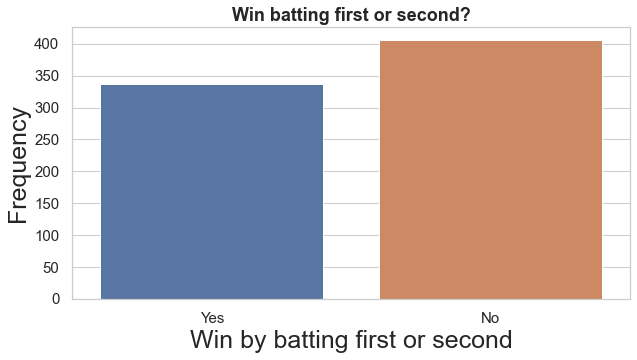

In [57]:
plt.figure(figsize=(10,5))
sns.countplot('win_batting_first', data = new_matches)
plt.title("Win batting first or second?",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Win by batting first or second", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- Teams batting second have won 54% times.

<a id=section50101></a>
### 5.1.9 Does winning toss help in winning matches?

In order to answer this question for this we create a new column with help of toss_winner and winner columns
whenever the values are equal we will put yes in the new column and no otherwise

In [58]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_win_game_win
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Yes
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Yes
5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Yes


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

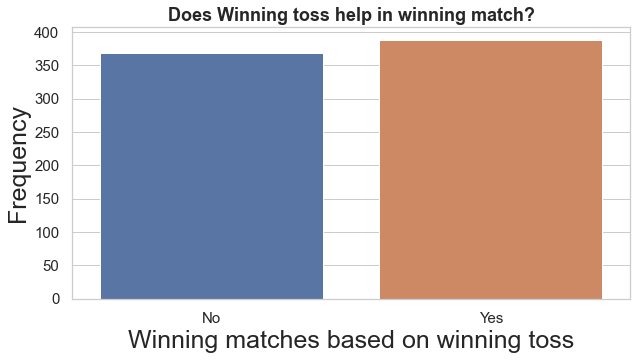

In [59]:
plt.figure(figsize=(10,5))
sns.countplot('toss_win_game_win', data=matches)
plt.title("Does Winning toss help in winning match?",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Winning matches based on winning toss", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- Teams winning tosses have won slightly more number of matches

<a id=section50101></a>
### 5.1.10 Which player's performance has mostly led to his team's win?

In [60]:
#MoM awards
MoM = pd.DataFrame(matches.player_of_match.value_counts())
MoM.head()

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
DA Warner,17
MS Dhoni,17


Text(0.5, 0, 'Players')

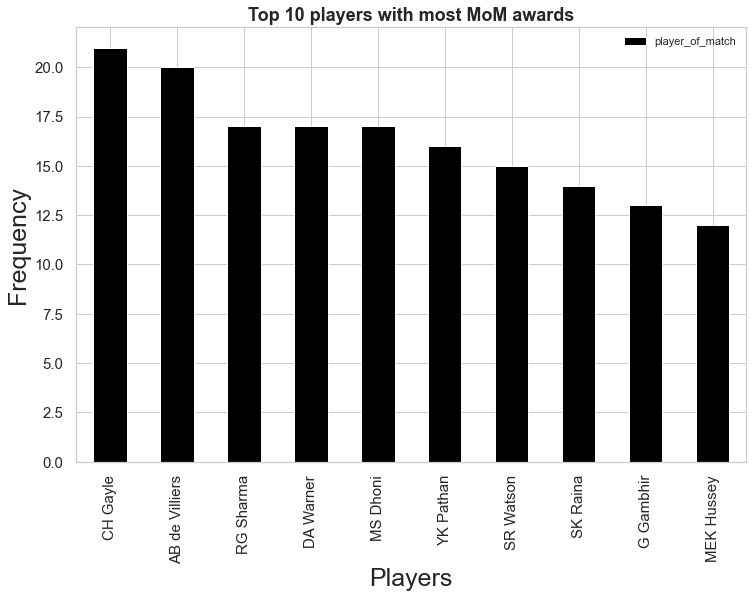

In [61]:
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

- **Chris Gayle** has so far won the most number of MoM awards followed by **AB de Villiers**.
- Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches

<a id=section50101></a>
### 5.1.11 Has Gayle won MoM awards consistently across all venues or does he have a skewed distribution towards any particular venue?

In [62]:
CH_Gayle = matches[matches['player_of_match']== 'CH Gayle'][['player_of_match','season','venue','city']]
CH_Gayle.groupby('venue')['player_of_match'].value_counts().sort_values(ascending = False)

venue                                                 player_of_match
M Chinnaswamy Stadium                                 CH Gayle           9
Punjab Cricket Association IS Bindra Stadium, Mohali  CH Gayle           3
Eden Gardens                                          CH Gayle           2
Wankhede Stadium                                      CH Gayle           1
Subrata Roy Sahara Stadium                            CH Gayle           1
Sawai Mansingh Stadium                                CH Gayle           1
Saurashtra Cricket Association Stadium                CH Gayle           1
MA Chidambaram Stadium, Chepauk                       CH Gayle           1
Kingsmead                                             CH Gayle           1
Feroz Shah Kotla                                      CH Gayle           1
Name: player_of_match, dtype: int64

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

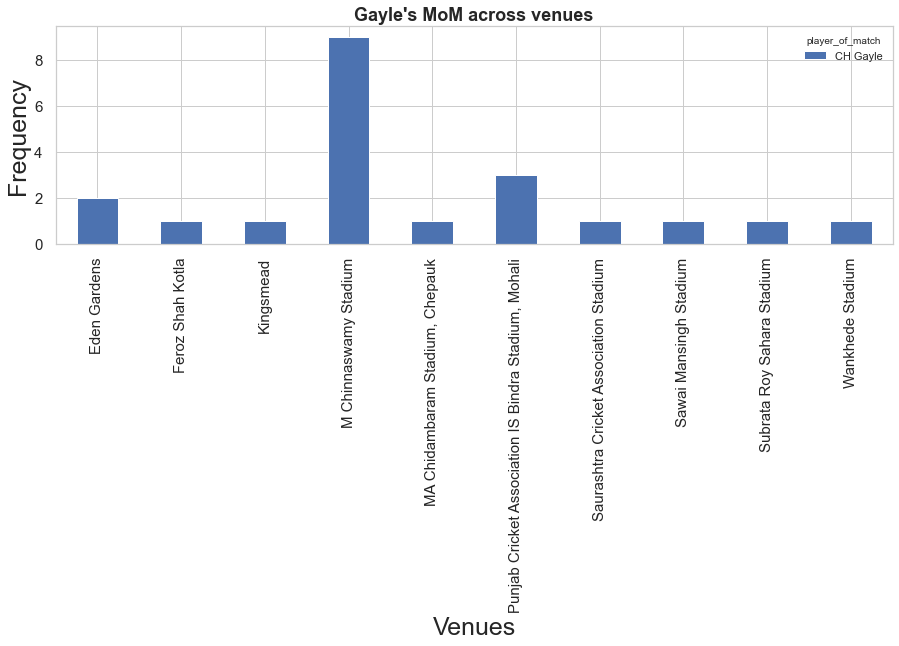

In [63]:
CH_Gayle.groupby('venue')['player_of_match'].value_counts().unstack().plot(kind = 'bar', stacked = False, 
                                                                          figsize =(15,4),fontsize =15)
plt.title("Gayle's MoM across venues",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Venues", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- Gayle has won MoM most in Bengaluru. This is mainly because he played for this franschise for the longest timeperiod.

<a id=section501></a>
## 5.2 Bivariate Analysis on Matches Data

Here we are doing bivariate analysis on matches data, deliveries data as well as merged data

<a id=section50101></a>
### 5.2.1 Do teams bat first or second after winning toss?

Text(0, 0.5, 'Count')

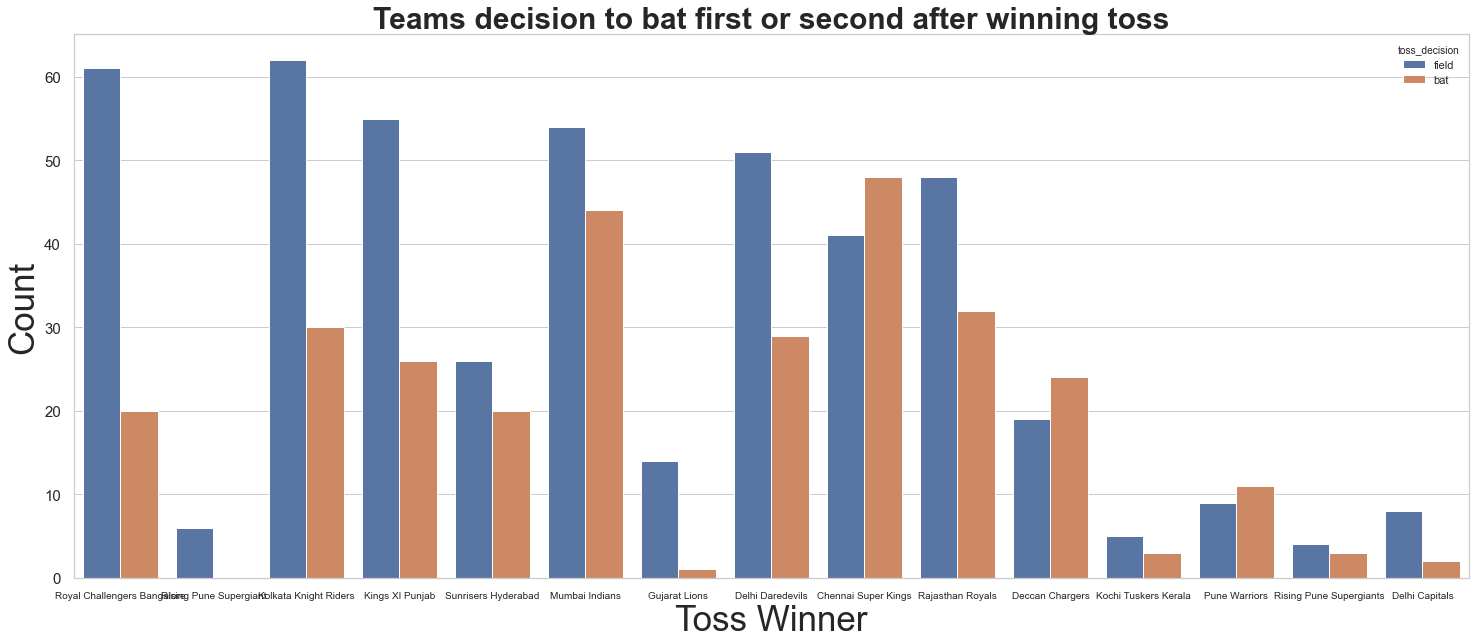

In [64]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

- Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

<a id=section50101></a>
### 5.2.2 How toss decision affects match results?

Text(0, 0.5, 'Frequency')

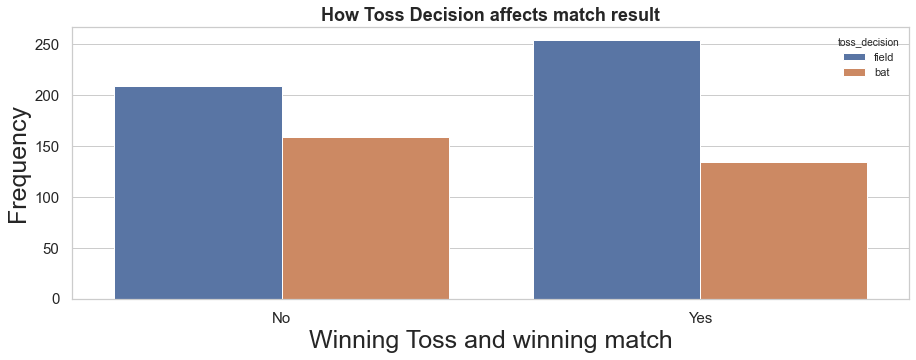

In [65]:
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

- Teams winning tosses and electng to field first have won most number of times.

In [66]:
pd.crosstab(matches.toss_win_game_win, matches.toss_decision)

toss_decision,bat,field
toss_win_game_win,,
No,159,209
Yes,134,254


<a id=section50101></a>
### 5.2.3 Does winning matches by fielding first vary across venues or it is universally true for all venues?

Text(0, 0.5, 'Venue')

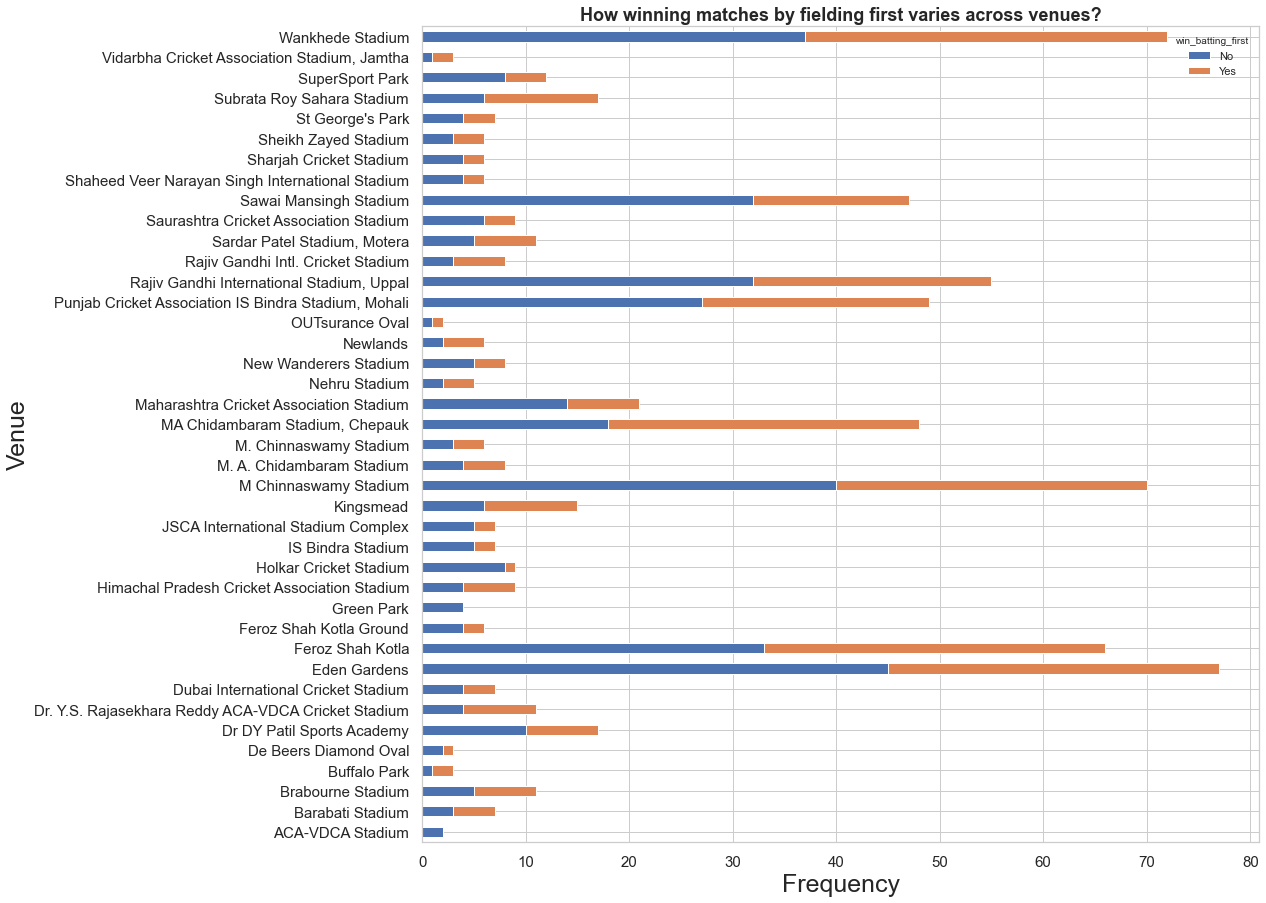

In [67]:
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

- Batting second has been more rewarding in almost all the venues

<a id=section50101></a>
### 5.2.4 Is batting second advantageous aross all years?

Text(0, 0.5, 'Count')

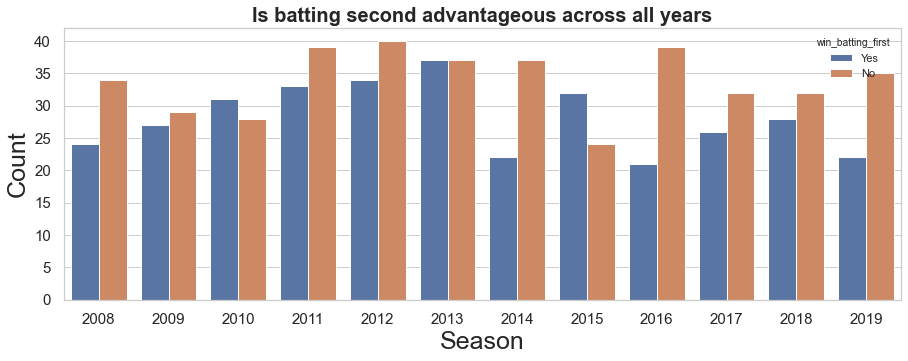

In [68]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

- Except for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

<a id=section50101></a>
### 5.2.5 Does winning by fielding first also valid for rain affected (dl) matches?

In [69]:
new_matches.groupby(['dl_applied','win_batting_first']).count()['season']

dl_applied  win_batting_first
0           No                   398
            Yes                  326
1           No                     8
            Yes                   11
Name: season, dtype: int64

Text(0, 0.5, 'Frequency')

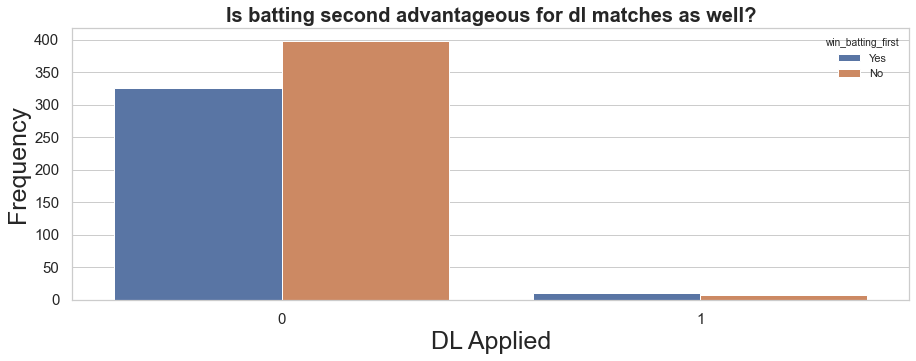

In [70]:
plt.figure(figsize = (15,5))
sns.countplot('dl_applied', data = new_matches, hue ='win_batting_first')
plt.title("Is batting second advantageous for dl matches as well?", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("DL Applied", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

- When dl was applied, there is hardly any difference between batting first and batting second though batting first has a slight advantage over batting second

<a id=section50101></a>
### 5.2.6 Are there any specific venues where DL has been most applied?

In [75]:
pd.DataFrame(pd.crosstab(new_matches['venue'], new_matches['dl_applied'])[1].sort_values(ascending = False)).head().reset_index().style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

,venue,1
0,Eden Gardens,4
1,Feroz Shah Kotla,3
2,M Chinnaswamy Stadium,3
3,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2
4,"Rajiv Gandhi International Stadium, Uppal",2


- In Eden Gardens, Duckworth Lewis has been applied 4 times so far followed by stadiums in Delhi and Bengaluru

<a id=section50101></a>
### 5.2.7 Which team has defended handsomely after winning toss i.e. won by big margins?

In order to answer this question we first need to plot the distribution win_by_runs column

Text(0, 0.5, 'Frequency')

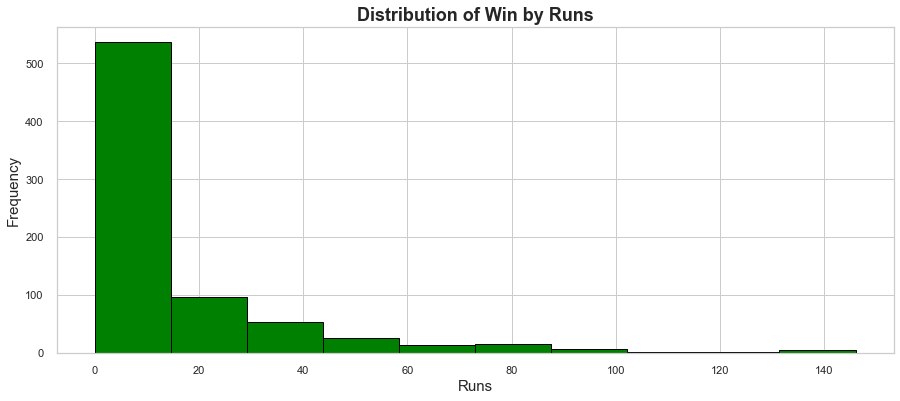

In [76]:
matches.win_by_runs.plot(kind = 'hist', edgecolor = 'black', figsize =(15,6), color = 'green') #right skewed
plt.title("Distribution of Win by Runs",fontsize= 18, fontweight = 'bold')
plt.xlabel("Runs", size = 15)
plt.ylabel("Frequency", size = 15)

#for a T20 match anything above 40 runs is quite a big win margin

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

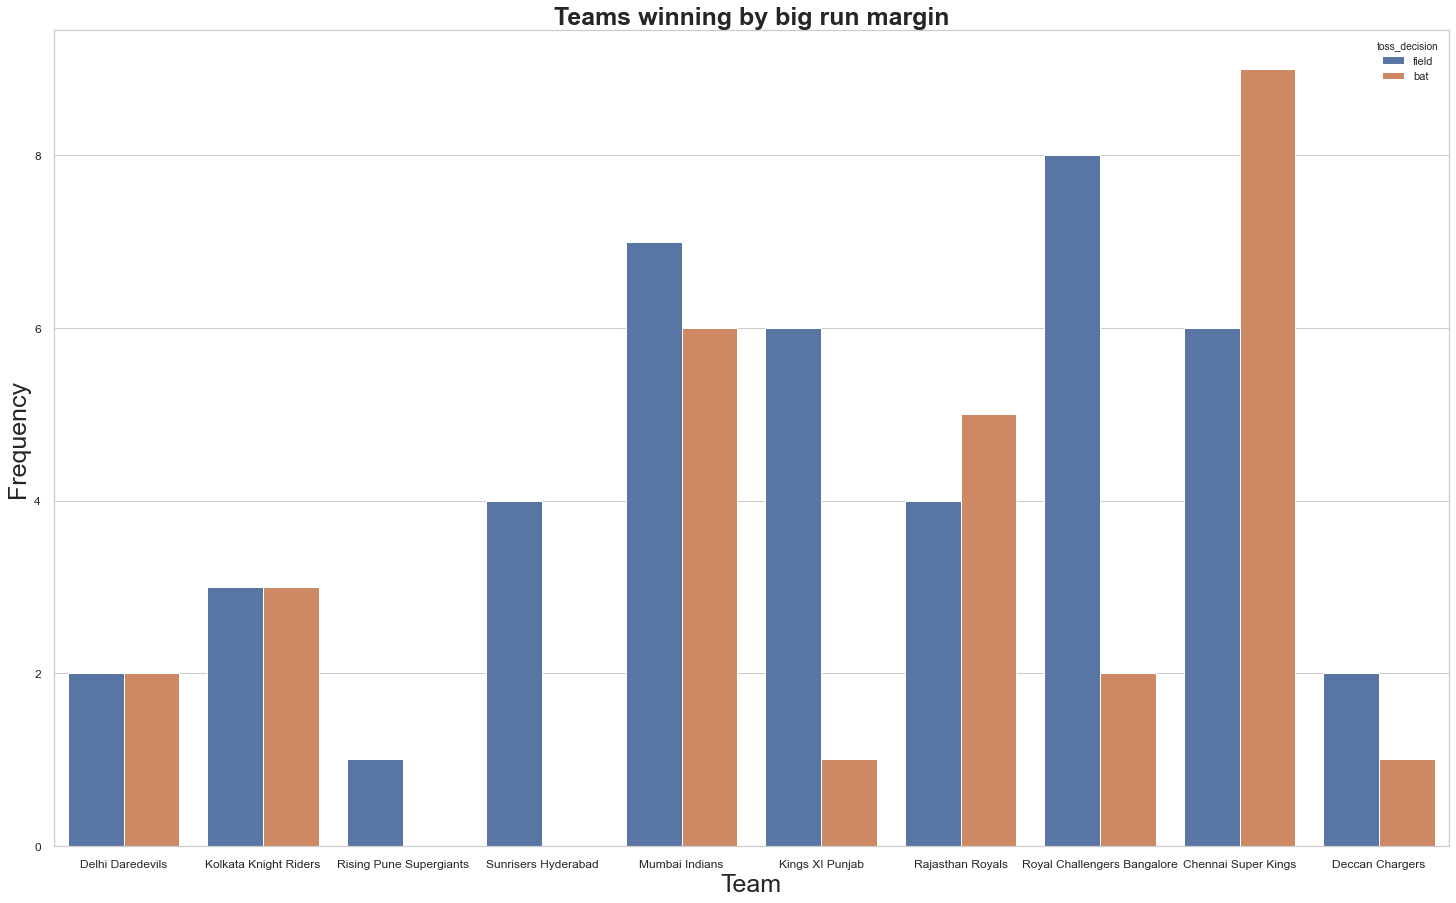

In [77]:
#Teams which have won matches by more than say 42 runs
big_run_margin = pd.DataFrame(matches[matches.win_by_runs > 42][['winner','toss_winner','toss_decision']])
plt.figure(figsize=(25,15))
sns.countplot('winner', data = big_run_margin, hue = 'toss_decision')
plt.title("Teams winning by big run margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- CSK has beaten opponents most number of times by big run margin. Also CSK has mostly decided to bat first after winning toss which explains their winning by runs phenomenon

<a id=section50101></a>
### 5.2.8 Which team has chased down totals successfully with good number of wickets left at hand?

In order to answer this question we first need to plot the distribution win_by_wickets column

Text(0, 0.5, 'Frequency')

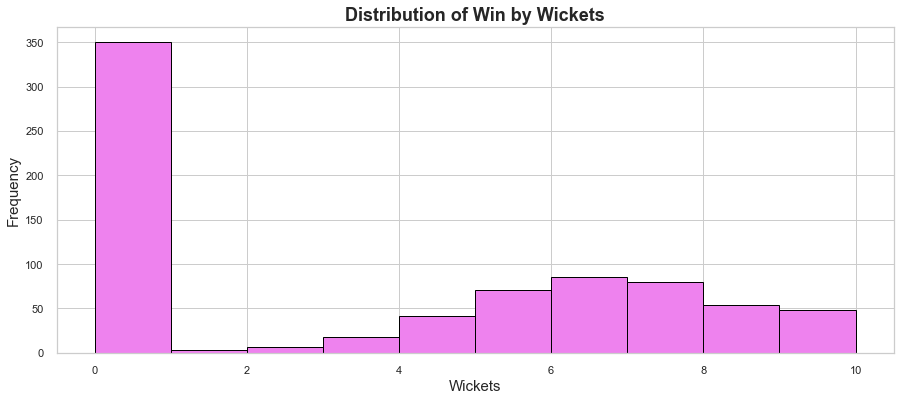

In [78]:
matches.win_by_wickets.plot(kind = 'hist', edgecolor = 'black', figsize =(15,6), color = 'violet') #right skewed
plt.title("Distribution of Win by Wickets",fontsize= 18, fontweight = 'bold')
plt.xlabel("Wickets", size = 15)
plt.ylabel("Frequency", size = 15)

#Winning with more than 5 wickets remaining is quite good in t20 matches

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1800x720 with 0 Axes>

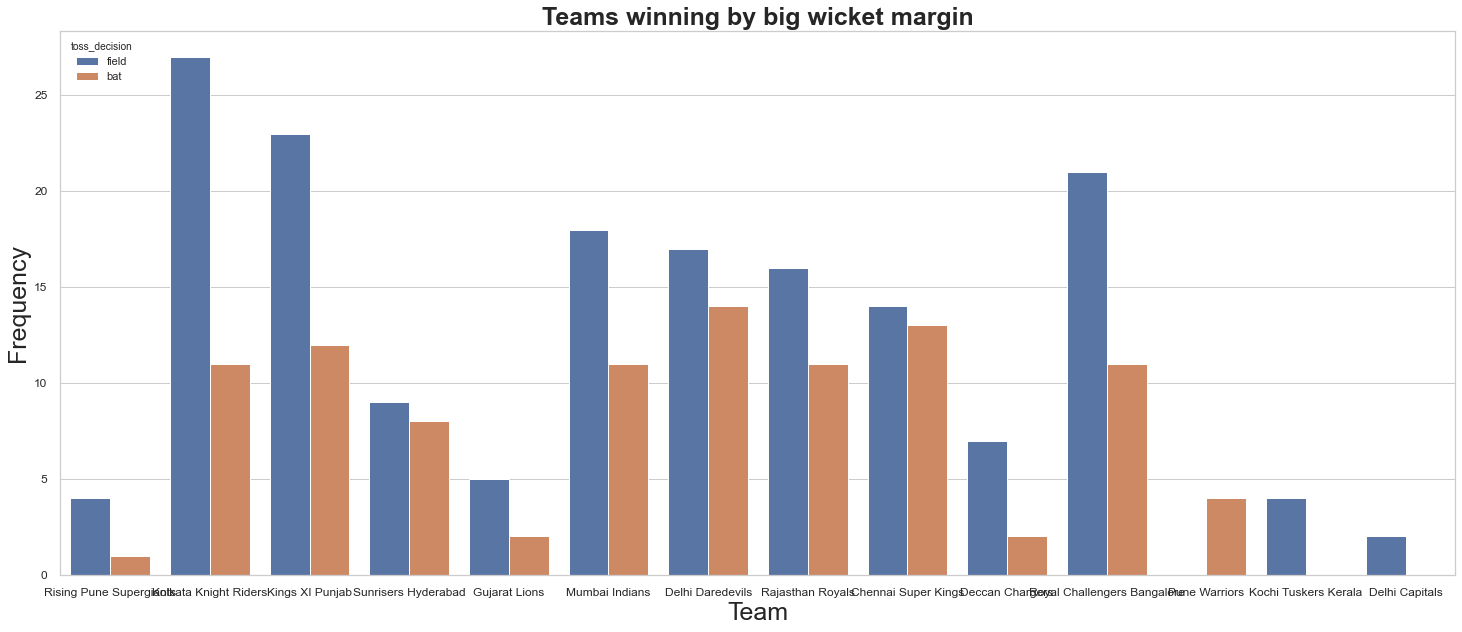

In [79]:
#Teams which have won matches by more than 5 wickets
big_wicket_margin = pd.DataFrame(matches[matches.win_by_wickets > 5][['winner','toss_winner','toss_decision']])
plt.figure(figsize=(25,10))
plt.figure(figsize=(25,10))
sns.countplot('winner', data = big_wicket_margin, hue='toss_decision')
plt.title("Teams winning by big wicket margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- KKR, Kings XI Punjab, Delhi Daredevils and RCB have won by good wicket margins over the years and they have all decided to field first after winning toss

### We will now use the merged data frame to gain more insghts - this time it will be based more on individual players

<a id=section501></a>
## 5.3 Univariate Analysis based on Merged Data

Here we are analysing the merged dataframe

<a id=section50101></a>
### 5.3.1 Have teams started to score more easily over the years?

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

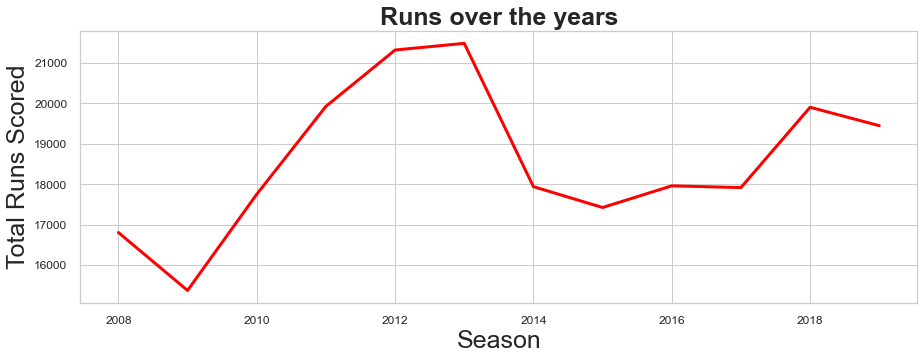

In [80]:
merge_df.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Run scoring has gone up from the start of the IPL in 2008.

<a id=section50101></a>
### 5.3.2 Are some venues more batsmen friendly than others?

In order to answer this question we can see the average runs scored in each venue which has hosted say minimum of 20 matches so far in IPL

In [81]:
venue_list = list(merge_df.venue.unique())
total_runs = {}
total_matches = {}

for i in venue_list:
    total_runs[i] = merge_df[merge_df.venue == i]['batsman_runs'].sum()
    total_matches[i] = merge_df[merge_df.venue == i].nunique()['match_id']
    
average_runs = pd.DataFrame({'runs':total_runs, 'matches':total_matches})
average_runs.reset_index(inplace = True)
average_runs['average'] = average_runs['runs']/average_runs['matches']

def highlight_cols(s):
    color = 'orange'
    return 'background-color: %s' % color
average_runs[average_runs['matches'] > 20].sort_values(by = 'average', ascending = False).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['index', 'matches','average']])

,index,runs,matches,average
1,Maharashtra Cricket Association Stadium,6556,21,312.190476
5,Wankhede Stadium,22419,73,307.109589
8,"Punjab Cricket Association IS Bindra Stadium, Mohali",14931,49,304.714286
11,"MA Chidambaram Stadium, Chepauk",14878,49,303.632653
4,M Chinnaswamy Stadium,22011,73,301.520548
7,Feroz Shah Kotla,19879,67,296.701493
6,Eden Gardens,22642,77,294.051948
0,"Rajiv Gandhi International Stadium, Uppal",16299,56,291.053571
10,Sawai Mansingh Stadium,13650,47,290.425532


- Maharashtra Cricket Association Stadium has the highest average 312.19 with 21 matches being played
- Most number of matches have been played in Chinnaswamy in Bengaluru and average is higher than 300. This suggests Chinnaswamy has been same batsman friendly followed by Wankhede in Mumbai

<a id=section50101></a>
### 5.3.3 Is there any pattern between most runs and batting order?

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

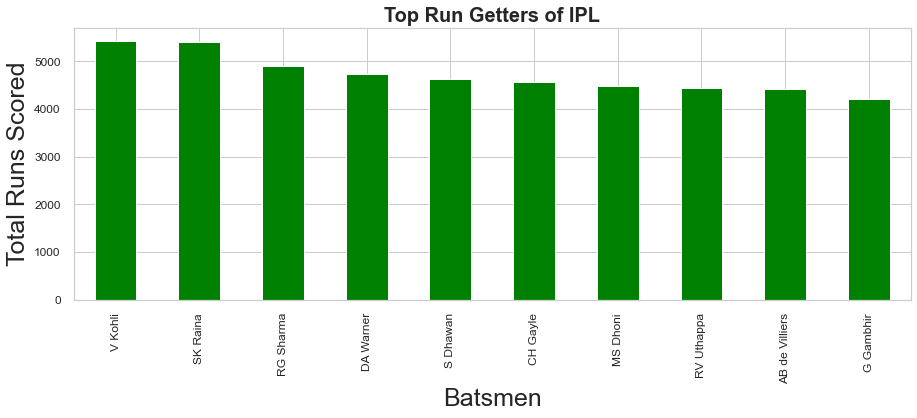

In [82]:
#let's plot the top 10 run getter so far in IPL
merge_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat
- Virat Kohli is the highest run getter in IPL.

<a id=section50101></a>
### 5.3.4 In a batsman dominated game, which bowlers have performed the best?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

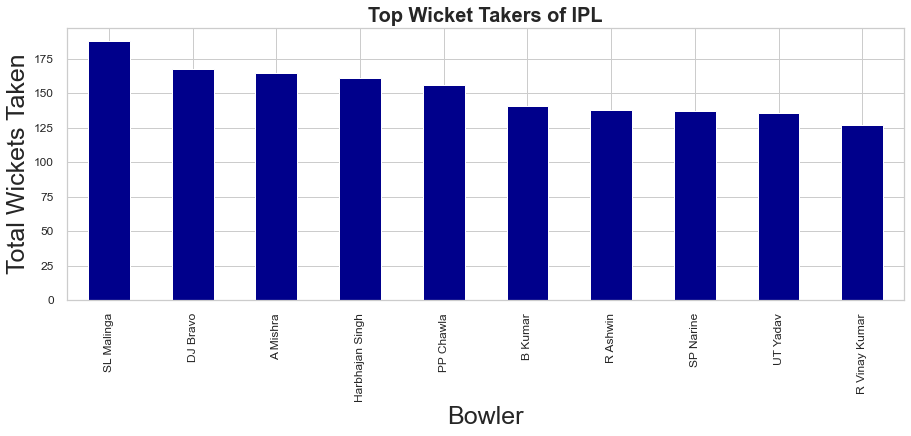

In [83]:
merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'darkblue', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra
- In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners 
- All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners
- All 5 pacers are right arm pacers

<a id=section501></a>
## 5.4 Bivariate Analysis based on Merged Data

<a id=section50101></a>
### 5.4.1 Runs scored by all the teams across seasons

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

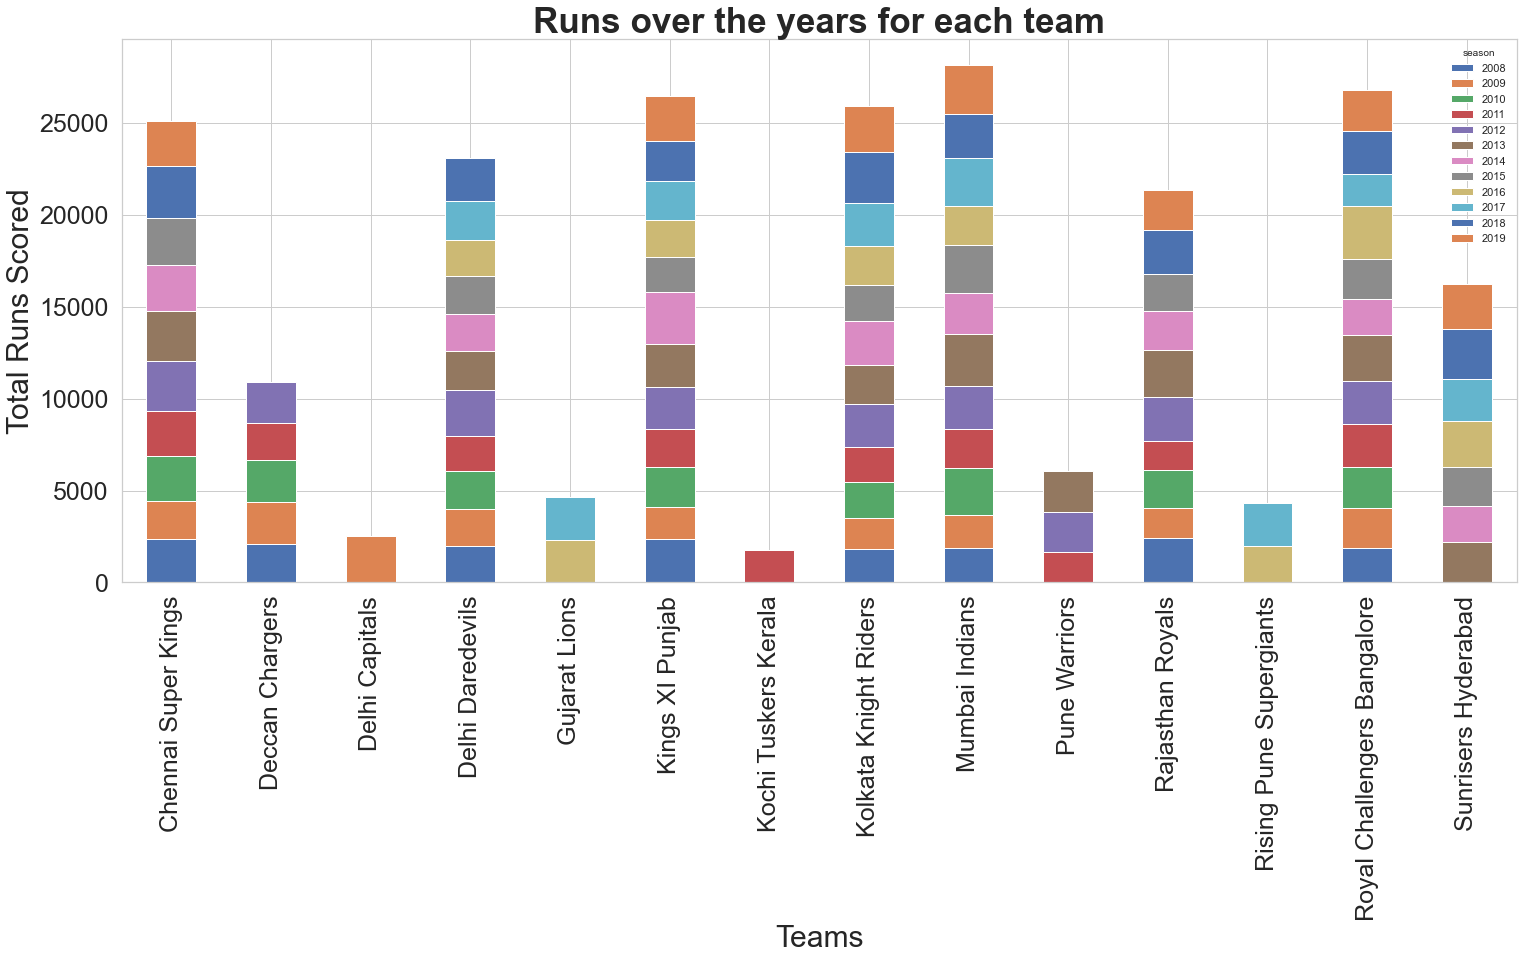

In [84]:
merge_df.groupby(['batting_team','season'])['batsman_runs'].sum().unstack().plot(kind = 'bar',stacked = True ,
                                                                                figsize = (25,10))
plt.title("Runs over the years for each team",fontsize= 35, fontweight = 'bold')
plt.xlabel("Teams", size = 30)
plt.ylabel("Total Runs Scored", size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)

- Over the years run scoring has gone up for all teams. For CSK, every year has seen more runs than preceeding year.

<a id=section50101></a>
### 5.4.2 Which batsman has been most consistent among top 10 run getters?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

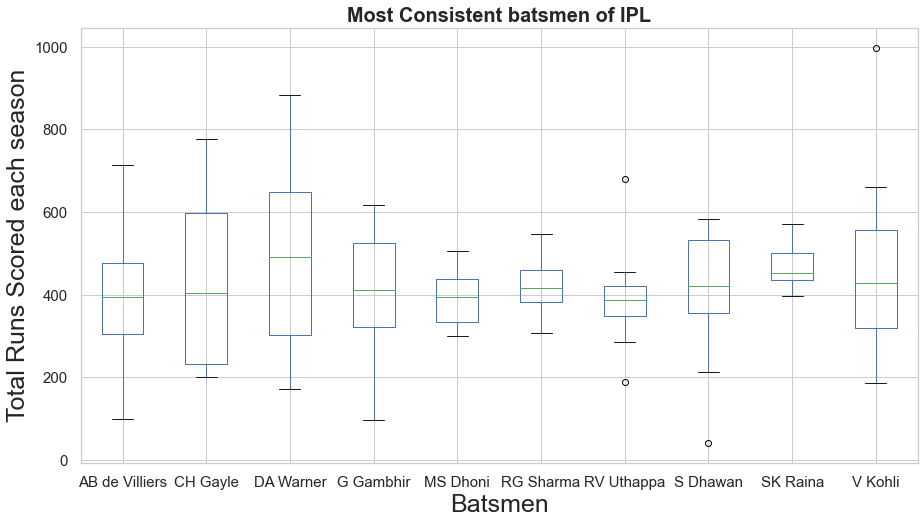

In [85]:
consistent_batsman = merge_df[merge_df.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- Median score for Warner is above all the top 10 run getters and next Raina He has the highest lowest run among all the batsmen across 11 seasons. 

<a id=section50101></a>
### 5.4.3 Batsmen who have maintained a healthy average over the years?

We will consider players who have played 11 to 12 seasons

In [86]:
#Players with highest batting average in IPL who have played 10 or 11 seasons?
no_of_matches = pd.DataFrame(merge_df.groupby('batsman')['match_id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'match':no_of_matches['match_id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['run']/batsman_df['match']
highest_avg = batsman_df[batsman_df['season'].isin([11,12])][['season','batsman','batting_average']].sort_values(by = 'batting_average',
                                                                                        ascending = False).head(10)

highest_avg

,season,batsman,batting_average
92,11,CH Gayle,36.774194
486,12,V Kohli,32.153846
26,12,AB de Villiers,31.183099
392,12,S Dhawan,29.316456
42,11,AM Rahane,29.166667
428,12,SK Raina,28.650794
147,11,G Gambhir,27.966887
444,11,SR Watson,27.800000
367,12,RG Sharma,27.000000
72,11,BB McCullum,26.541284


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

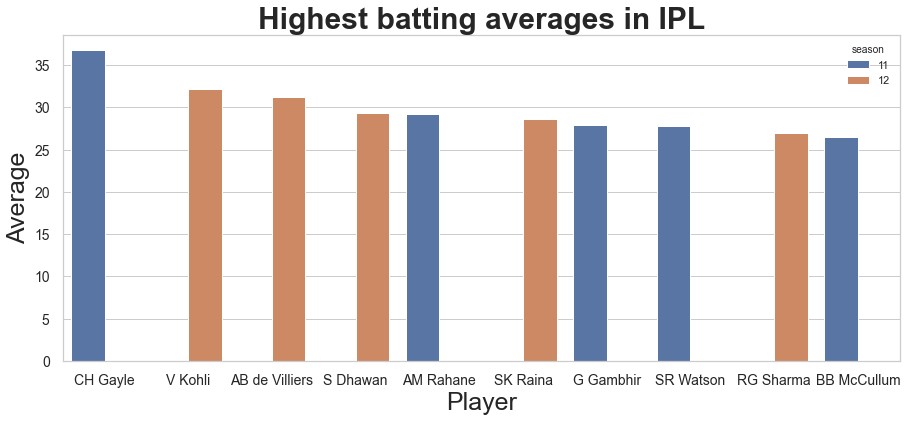

In [87]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='batting_average', data = highest_avg, hue = 'season')
plt.title("Highest batting averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

- Gayle has the highest average followed by Kohli and AB de Villiers
- Rahane, Watson and McCullum might not be in the top 10 run getters but have maintained a good average over the years.

We will also consider batsmen in last 5 seasons who have had the best average

In [88]:
#Players with highest batting average in IPL who have played 10 or 11 seasons?
no_of_matches = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['match_id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'match':no_of_matches['match_id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['run']/batsman_df['match']
highest_avg_last_4_seasons = batsman_df[['season','batsman','batting_average','run']].sort_values(by = 'batting_average',
                                                                                        ascending = False)

highest_avg_last_4_seasons.head(10)

highest_avg_last_4_seasons.style.apply(lambda x: ['background: darkgreen' if x.name in [51,226,8,110,107,182] 
                              else '' for i in x], 
                   axis=1)

,season,batsman,batting_average,run
55,4,DA Warner,48.736842,2778
94,1,J Bairstow,46.800000,468
255,5,V Kohli,39.957143,2797
119,4,KL Rahul,38.062500,1827
10,5,AB de Villiers,37.428571,2358
83,2,HM Amla,36.062500,577
191,1,R Parag,33.800000,169
186,4,Q de Kock,33.250000,1330
203,4,RR Pant,33.185185,1792
23,2,AS Yadav,33.172414,962


- Kohli, AB are up there just like before implying they have maintained themselves throughout all the seasons
- Last 3 seasons, David Warner has scored massively with 45+ average
- Kane Williamson has also done great taking over the captaincy of SRH
- KL Rahul and Rishabh Pant have also started to get in limelight in last few seasons

<a id=section50101></a>
### 5.4.4 Batsmen with the best strike rates over the years

We will consider players who have played 10 or more seasons

In [93]:
no_of_balls = pd.DataFrame(merge_df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

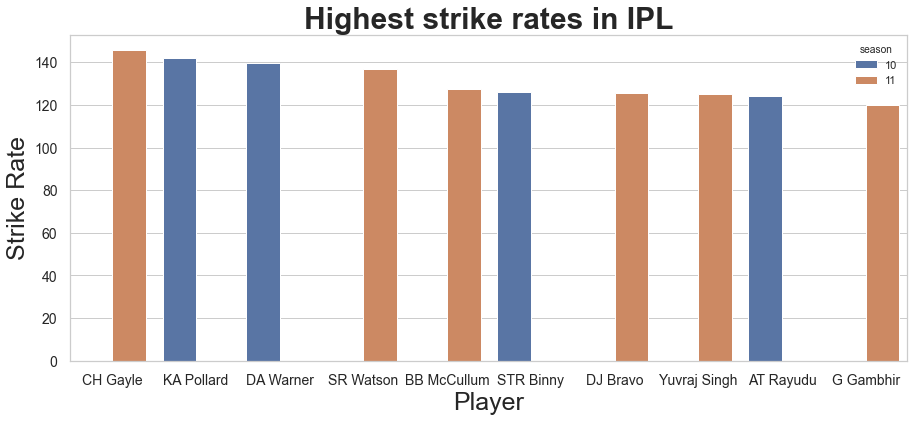

In [90]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

-  Gayle, Pollard have the highest strike rates in IPL. They are the big hitters and can win any match on their day
- One surprise here is that STR Binny who is a allrounder has a strike rate of 125+ and comes before Yuvraj in ranking

We will also consider batsmen in last 5 seasons

In [95]:
no_of_balls = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df[merge_df.season.isin([2015,2016,2017,2018,2019])].groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate_4_seasons = batsman_strike_rate[['season','batsman','strike_rate', 'run','balls']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate_4_seasons.head(10)


highest_strike_rate_4_seasons.style.apply(lambda x: ['background: darkgreen' if x.name in [11,206] 
                              else '' for i in x], 
                   axis=1)

,season,batsman,strike_rate,run,balls
32,1,B Stanlake,250.000000,5,2
95,1,J Botha,206.666667,31,15
222,1,S Sharma,200.000000,8,4
18,1,AN Ahmed,200.000000,10,5
13,4,AD Russell,183.930943,1385,753
235,5,SP Narine,174.200913,763,438
210,1,S Curran,172.727273,95,55
110,2,K Gowtham,172.093023,148,86
232,4,SN Thakur,171.428571,36,21
131,2,M Ali,169.945355,311,183


- Clearly, in top 10 all are mostly bowlers. However, Narine had opened for KKR on many occassions and hence has faced so many overs and scored 750 + runs in last 5 seasons
- Andre Russell stands out among hard hitters in last 5 seasons with an extraordinary strike rate of 183.93 having faced close to 500 balls and scoring 840 runs

<a id=section50101></a>
### 5.4.5 Which bowlers have performed well over last few seasons and can be considered further for upcoming auctions?

We will consider the bowling average here for bowlers who have taken at least 50 wickets

In [96]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_runs'].sum())
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_avg = pd.DataFrame({'runs':runs_given['batsman_runs'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_avg.reset_index(inplace = True)

bowler_avg['wickets'].dropna(axis = 0, inplace = True)

In [97]:
bowler_avg['bowling_average'] = bowler_avg['runs']/bowler_avg['wickets']
best_bowling_avg = bowler_avg[bowler_avg['wickets'] > 50].sort_values(by = 'bowling_average', ascending = True).head(10)

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

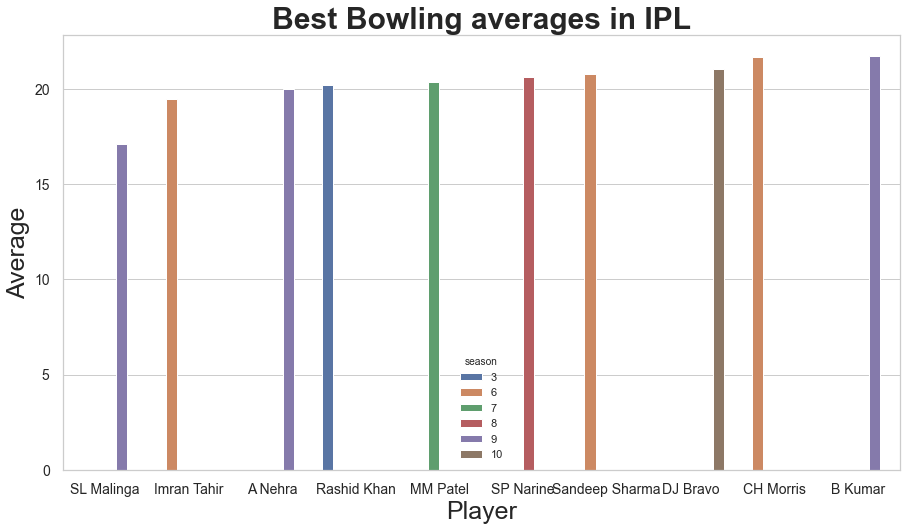

In [98]:
plt.figure(figsize = (15,8))
sns.barplot(x='bowler', y='bowling_average', data = best_bowling_avg, hue = 'season')
plt.title("Best Bowling averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

- Malinga has taken the most wickets at the best avg of 16.27. 
- Malinga, Narine, Imran Tahir, Nehra have played 8 and above seasons and hence have taken more wickets and improved average

We can see players who have played last 5-6 seasons and see their average and number of wickets to understand which bowlers can be chosen in upcoming auctions

In [99]:
runs_given = pd.DataFrame(merge_df[merge_df['season'].isin([2014,2015,2016,2017,2018,2019])].groupby('bowler')['batsman_runs'].sum())
wickets_taken = pd.DataFrame(merge_df[(merge_df['dismissal_kind'] != 'no dismissal') & (merge_df['season'].isin([2014,2015,2016,2017,2018,2019]))].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df[merge_df['season'].isin([2014,2015,2016,2017,2018,2019])].groupby('bowler')['season'].nunique())
bowler_avg_5_seasons = pd.DataFrame({'runs':runs_given['batsman_runs'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_avg_5_seasons.reset_index(inplace = True)

bowler_avg_5_seasons['wickets'].dropna(axis = 0, inplace = True)

In [100]:
bowler_avg_5_seasons['bowling_average'] = bowler_avg_5_seasons['runs']/bowler_avg_5_seasons['wickets']
best_bowler_avg_5_seasons = bowler_avg_5_seasons[bowler_avg_5_seasons['wickets'] > 50].sort_values(by = 'bowling_average', ascending = True)

In [101]:
def highlight_cols(s):
    color = 'green'
    return 'background-color: %s' % color

best_bowler_avg_5_seasons.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','bowling_average']])

,bowler,runs,wickets,season,bowling_average
5,A Nehra,959,54,4,17.759259
68,Imran Tahir,1595,82,6,19.451220
180,Rashid Khan,1214,60,3,20.233333
202,SL Malinga,1480,72,4,20.555556
22,B Kumar,2386,116,6,20.568966
35,CH Morris,1301,61,5,21.327869
211,Sandeep Sharma,1756,82,5,21.414634
11,AD Russell,1293,59,5,21.915254
233,YS Chahal,2266,102,6,22.215686
43,DJ Bravo,1771,78,4,22.705128


 In the last 4-5 seasons, Ashish Nehra had a very good bowling average of 17.75
- Bhubaneswar Kumar had 20.57 average but has taken 116 wickets much higher than anyone else in last 5 years. 
- Among spinners, Imran Tahir has performed quite well over last few seasons with an average of 19.45 
- Chahal has also performed well by picking up 102 wickets with an average of 22.21 only
- Narine had a very good avg of 19.62 in 7 seasons that he had played but in last 5 seasons it slipped to 26.34 This means Narine has picked up less wickets wrt to runs given in last 5 years.
- Bhubaneswar Kumar stands out among the pacers while Tahir stands out among the spinners

<a id=section50101></a>
### 5.4.6 Which bowlers have picked up wickets more frequently?

In [102]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(merge_df.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [103]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'green'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


- Imran Tahir, Bravo, Malinga have very impressive strike rates. However, both Bravo and Malinga have played 8-9 seasons of IPL and managed to maintain such good strike rates. 
- Tahir has been sensational in terms of bowling average and strike rates among spinners in last 5 years
- Tahir is the only spinner in top 10

<a id=section50101></a>
### 5.4.7 Which bowlers have maintained best economy rates over the years?

In [104]:
runs_given = pd.DataFrame(merge_df.groupby('bowler')['batsman_runs'].sum())
balls_bowled = pd.DataFrame(merge_df.groupby('bowler')['ball'].count())
overs_bowled = balls_bowled['ball']/6
wickets_taken = pd.DataFrame(merge_df[merge_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_runs'],'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)

In [105]:
#Best economy rates for bowlers who have played at least 5 seasons
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)

In [106]:
best_economy_rate.head().style.apply(lambda x: ['background: lightgreen' if x.name in [106,315,253] 
                              else '' for i in x], 
                   axis=1)

,bowler,runs,balls,wickets,season,overs,economy_rate
108,DW Steyn,2283,2207,104,10,367.833333,6.206615
207,M Muralitharan,1642,1581,67,7,263.500000,6.231499
291,RN ten Doeschate,88,83,3,5,13.833333,6.361446
286,RE van der Merwe,486,455,25,5,75.833333,6.408791
269,R Ashwin,3224,3016,138,10,502.666667,6.413793


- Steyn has the best economy rate in IPL followed by Muralitharan	
- Steyn has bowled 367 overs and maintained a very impressive economy of 6.20
- Among spinners who are still active, Ashwin has the best economy of 6.41

<a id=section50101></a>
### 5.4.8 Is there a pattern between extras provided by pacers and spinners?

In [107]:
wides = pd.DataFrame(merge_df.groupby('bowler')['wide_runs'].sum())
noballs = pd.DataFrame(merge_df.groupby('bowler')['noball_runs'].sum())
season = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())

extras_by_bowlers = pd.DataFrame({'wides':wides['wide_runs'],'no_balls':noballs['noball_runs']})
extras_by_bowlers.reset_index(inplace = True)

In [108]:
extras_by_bowlers['total_extras'] = extras_by_bowlers['wides'] + extras_by_bowlers['no_balls']
most_extras = extras_by_bowlers.sort_values(by='total_extras', ascending = False).head(15)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

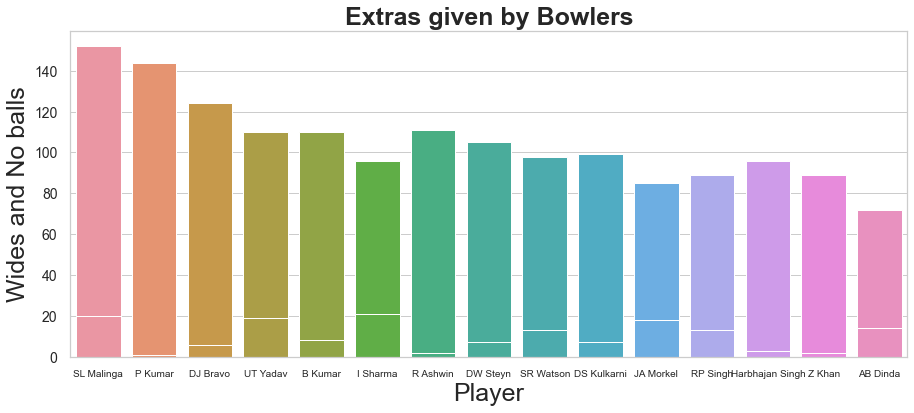

In [109]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'bowler', y = 'wides', data = most_extras)
sns.barplot(x = 'bowler', y = 'no_balls', data = most_extras)
plt.title("Extras given by Bowlers",fontsize= 25, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Wides and No balls", size = 25)
plt.xticks(size = 10)
plt.yticks(size = 14)

- Malinga has given away most extras
- Top 5 in this list are all pacers.
- Among bowlers with most extras, Malinga and Ishant Sharma have given away most number of extras as no balls
- Spinners generally do not give away many extra runs
- Ashwin and Harbhajan are the only spinners in top 20 to give away most runs as extras

In [110]:
#Understanding no ball stats
extras_by_bowlers.style.apply(lambda x: ['background: red' if x.name in [6] 
                              else '' for i in x], 
                   axis=1)

,bowler,wides,no_balls,total_extras
0,A Ashish Reddy,8,2,10
1,A Chandila,0,0,0
2,A Choudhary,6,1,7
3,A Dananjaya,1,0,1
4,A Flintoff,0,0,0
5,A Joseph,3,0,3
6,A Kumble,26,5,31
7,A Mishra,57,20,77
8,A Mithun,15,9,24
9,A Nehra,64,9,73


- Amit Mishra is the only spinner in top 20 who has bowled most number of no balls in IPL. He has overstepped a lot more times than any other spinner

<a id=section5></a>
## 6. Conclusion

- Most teams decide to chase down totals after winning toss except for CSK which goes well with the fact that the have won most games (by good margin) by defending
- 54% times teams who have chased irrespective of winning or losing toss have won matches. But teams winning tosses and electing to field first have won most number of times. It has been uniform across all venues. Particularly KKR, KIX Punjab, DD and RCB have won by big wicket margin
- With rain affected matches also there seems to be slight advantage for teams batting second
- MoM awards have mostly been received by batsmen implying t20 is a more batsmen-oriented game. Venues like Chinnaswamy,Wankhede, MCA, Mohali, Chepauk have been more batsman-friendly than others
- Mostly the top run getters have been openers or 1st or 2nd down  batsmen except for MS Dhoni. That's becuase he has played a lot of matches
- Suresh Raina has been most consistent batsmen among top run scorers while Gayle, Pollard  have the highest strike rate among all players who have played 10 or more seasons
- Gayle has had the best average of 36.4 among all batsmen with more than 9 seasons under their belt. He has been sensational with most number of Man of the Match awards while in last 4 seasons David Warner has started amassing lot of runs with an average over 45.
- Rahane, Watson are not in top 10 run getters but have maintained a good average across the seasons
- In last 4 seasons, Andre Russel has been phenomenal with 175+ strike rate
- Malinga has been the most impressive bowler in IPL with more than 170 wickets at an average of 16.27, economy of 6.16 and strike rate of 15.84
- In last 5 years however, Bhubaneswar Kumar has stood out among pacers with 102 wickets under his name with an average of 18.82, strike rate of 18.42 and economy rate of 6.67
- Among spinners, Imran Tahir has performed quite well over last few seasons with an average of 20.62 and strike rate of 15.36
- Spinners generally do not give away many extra runs and all bowlers in top 10 of that list are pacers. 
- Amit Mishra is the only spinner in top 20 who has overstepped most number of times (21 no balls). He is second in the list of bowlers with most number of no balls after Ishant Sharma

<a id=section601></a>
### Actionable Insights

- Win toss and field first so as to win more matches irrespective of venues.

- If rain prediction is there, then also win toss and field first

- During auctions, if franchise is looking for a consistent batsman, they can go for Raina

- Go for Rusell, Gayle, AB, Watson if looking for the big hitters who can also score a lot of runs

- AB can be good catch as he has scored a lot of runs and maintained a very high strike rate of close to 150 over so many years.

- If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then Malinga could be a good option. The only concern is that he gives away too many extras

- Tahir can be an equally good option as he has been the most impressive spinner in last few seasons woth a good strike rate and healthy average. However his economy rate has been on the higher side (8+)
